**I | Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**II | Imput the data**

In [2]:
df = pd.read_csv('/kaggle/input/countries-of-the-world-2023/world-data-2023.csv')
df

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175",...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",...,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


**III | Describe the Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

In [4]:
df.describe().style.format("{:.2f}")

,Birth Rate,Calling Code,Fertility Rate,Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Latitude,Longitude
count,189.00,194.00,188.00,189.00,187.00,181.00,188.00,194.00,194.00
mean,20.21,360.55,2.70,21.33,72.28,160.39,1.84,19.09,20.23
std,9.95,323.24,1.28,19.55,7.48,233.50,1.68,23.96,66.72
min,5.90,1.00,0.98,1.40,52.80,2.00,0.01,-40.90,-175.20
25%,11.30,82.50,1.71,6.00,67.00,13.00,0.33,4.54,-7.94
50%,17.95,255.50,2.25,14.00,73.20,53.00,1.46,17.27,20.97
75%,28.75,506.75,3.60,32.70,77.50,186.00,2.94,40.12,48.28
max,46.08,1876.00,6.91,84.50,85.40,1150.00,8.42,64.96,178.07


# **EXPLORATORY DATA ANALYSIS**

**I | Handling duplicates**

In [5]:
duplicates_rows_data = df[df.duplicated()]
print("number of duplicate row : ", duplicates_rows_data.shape)

number of duplicate row :  (0, 35)


There are 0 columns that contain duplicates.

**II | Uniqueness**

In [6]:
# Look through each column and count the number of distinct values
for columns in df.columns:
    num_distinct_values = len(df[columns].unique())
    print(f"{columns}: {num_distinct_values} distinct values")

Country: 195 distinct values
Density
(P/Km2): 137 distinct values
Abbreviation: 189 distinct values
Agricultural Land( %): 169 distinct values
Land Area(Km2): 195 distinct values
Armed Forces size: 106 distinct values
Birth Rate: 171 distinct values
Calling Code: 183 distinct values
Capital/Major City: 193 distinct values
Co2-Emissions: 185 distinct values
CPI: 176 distinct values
CPI Change (%): 87 distinct values
Currency-Code: 134 distinct values
Fertility Rate: 140 distinct values
Forested Area (%): 162 distinct values
Gasoline Price: 102 distinct values
GDP: 194 distinct values
Gross primary education enrollment (%): 142 distinct values
Gross tertiary education enrollment (%): 172 distinct values
Infant mortality: 145 distinct values
Largest city: 189 distinct values
Life expectancy: 135 distinct values
Maternal mortality ratio: 115 distinct values
Minimum wage: 115 distinct values
Official language: 78 distinct values
Out of pocket health expenditure: 161 distinct values
Physicia

**III | Missing values**

In [7]:
print(df.isnull().sum())

Country                                       0
Density\n(P/Km2)                              0
Abbreviation                                  7
Agricultural Land( %)                         7
Land Area(Km2)                                1
Armed Forces size                            24
Birth Rate                                    6
Calling Code                                  1
Capital/Major City                            3
Co2-Emissions                                 7
CPI                                          17
CPI Change (%)                               16
Currency-Code                                15
Fertility Rate                                7
Forested Area (%)                             7
Gasoline Price                               20
GDP                                           2
Gross primary education enrollment (%)        7
Gross tertiary education enrollment (%)      12
Infant mortality                              6
Largest city                            

In [8]:
df = df.dropna(axis=0)

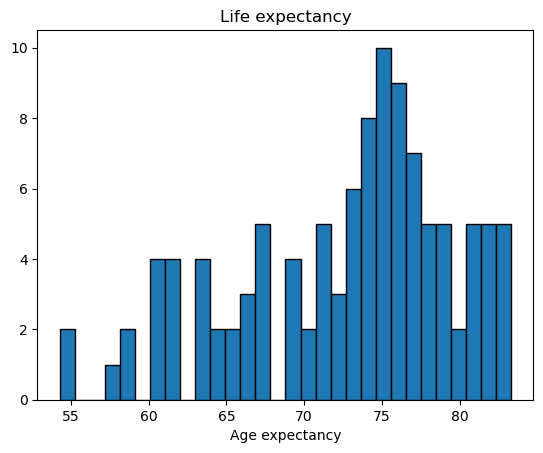

In [9]:
plt.hist(df['Life expectancy'], bins=30, edgecolor="black")
plt.xlabel("Age expectancy")
plt.title("Life expectancy")
plt.show()

In [10]:
df["GDP"].head()

0     $19,101,353,833 
1     $15,278,077,447 
2    $169,988,236,398 
4     $94,635,415,870 
6    $449,663,446,954 
Name: GDP, dtype: object

**IV | Transform columns with object to numeric**

In [11]:
# Set the option to ignore the SettingWithCopyWarning
pd.options.mode.chained_assignment = None

# Set the option to ignore the FutureWarning
pd.options.mode.use_inf_as_na = False

df['Density\n(P/Km2)'] = df['Density\n(P/Km2)'].str.replace(',', '').astype(float)
df['Agricultural Land( %)'] = df['Agricultural Land( %)'].str.replace('%', '').astype(float)
df['Land Area(Km2)'] = df['Land Area(Km2)'].str.replace(',', '').astype(float)
df['Co2-Emissions'] = df['Co2-Emissions'].str.replace(',', '').astype(float)
df['Urban_population'] = df['Urban_population'].str.replace(',', '').astype(float)
df['CPI Change (%)'] = df['CPI Change (%)'].str.replace('%', '').astype(float)
df['Forested Area (%)'] = df['Forested Area (%)'].str.replace('%', '').astype(float)
df['Gross primary education enrollment (%)']= df['Gross primary education enrollment (%)'].str.replace('%', '').astype(float)
df['Gross tertiary education enrollment (%)'] = df['Gross tertiary education enrollment (%)'].str.replace('%', '').astype(float)
df['Population: Labor force participation (%)'] = df['Population: Labor force participation (%)'].str.replace('%', '').astype(float)
df['Tax revenue (%)'] = df['Tax revenue (%)'].str.replace('%', '').astype(float)
df['Armed Forces size'] = df['Armed Forces size'].str.replace(',', '').astype(float)
df['CPI'] = df['CPI'].str.replace(',', '').astype(float)
df['Gasoline Price'] = df['Gasoline Price'].str.replace('$', '').astype(float)
df['Unemployment rate'] = df['Unemployment rate'].str.replace('%', '').astype(float)
df['Total tax rate'] = df['Total tax rate'].str.replace('%', '').astype(float)
df['Population'] = df['Population'].str.replace(',', '').astype(float)
df['Minimum wage'] = df['Minimum wage'].str.replace('$', '').astype(float)
df['Out of pocket health expenditure'] = df['Out of pocket health expenditure'].str.replace('%', '').astype(float)
df['GDP'] = df['GDP'].str.replace('$', '')
df['GDP'] = df['GDP'].str.replace(',', '').astype(float)

# Set the option back to 'warn' if you want to see the warnings again
pd.options.mode.chained_assignment = 'warn'

# Set the option back to its default value (True) if you want to see the warnings again
pd.options.mode.use_inf_as_na = True

/tmp/ipykernel_20/1323374499.py:20: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Gasoline Price'] = df['Gasoline Price'].str.replace('$', '').astype(float)
/tmp/ipykernel_20/1323374499.py:24: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Minimum wage'] = df['Minimum wage'].str.replace('$', '').astype(float)
/tmp/ipykernel_20/1323374499.py:26: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['GDP'] = df['GDP'].str.replace('$', '')


/tmp/ipykernel_20/2825294508.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=False, cmap='jet')


<Axes: >

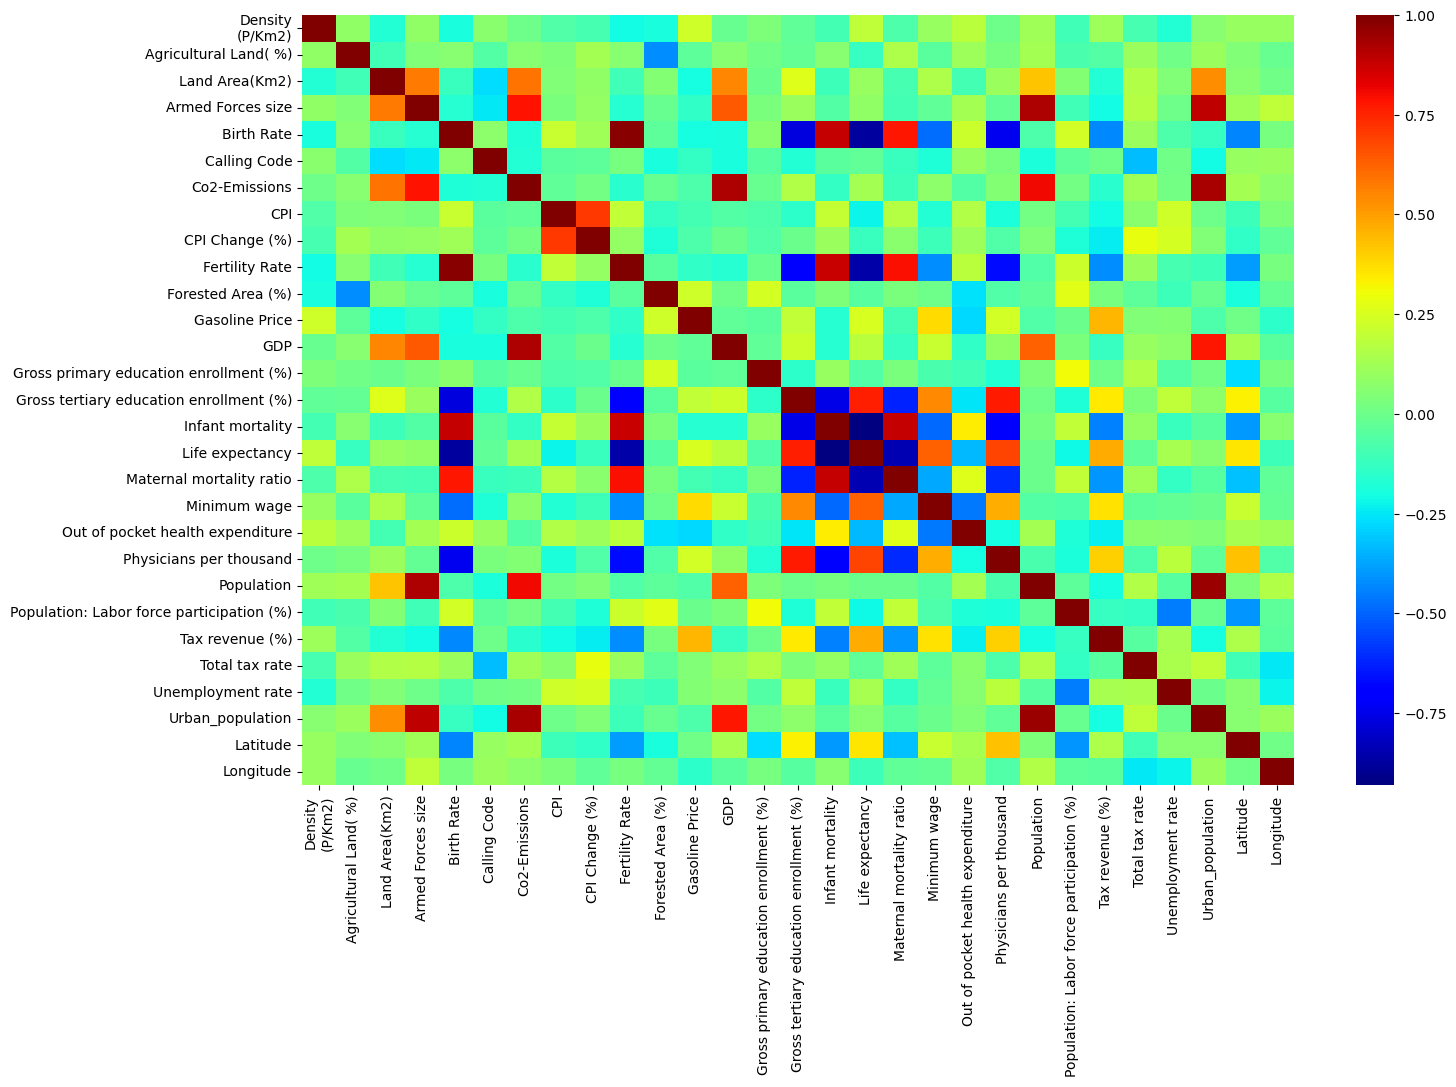

In [12]:
# Let's see if there is some correlation between the columns
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=False, cmap='jet')

<Axes: xlabel='Birth Rate', ylabel='Infant mortality'>

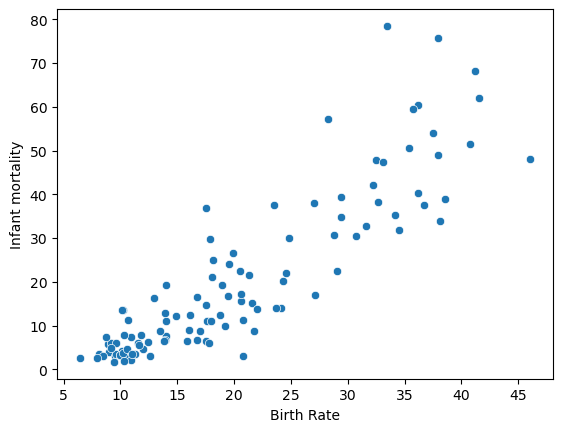

In [13]:
sns.scatterplot(data=df, x="Birth Rate",y="Infant mortality")

<Axes: xlabel='Life expectancy', ylabel='GDP'>

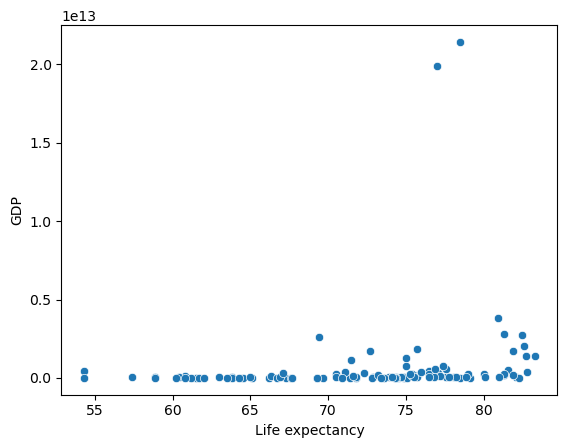

In [14]:
sns.scatterplot(data=df, x="Life expectancy",y="GDP")

# V | Geospatial plots

In [15]:
fig = px.choropleth(df, locationmode="country names", locations=df["Country"], color="GDP", title="GDP for each country")
fig.show()

In [16]:
fig = px.choropleth(df, locationmode="country names", locations=df["Country"], color="Co2-Emissions", title="Co2 emissions for each country")
fig.show()

From this plot, it's evident that the country with the most co2 emissions are in Asia and in south America.